<a href="https://colab.research.google.com/github/Imama-Kainat/CampusCoderInternship/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Drop customerID column as it is not useful for prediction
df.drop('customerID', axis=1, inplace=True)


In [5]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize the model with a higher max_iter and a different solver
model = LogisticRegression(max_iter=1000, solver='lbfgs')


In [10]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


In [12]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



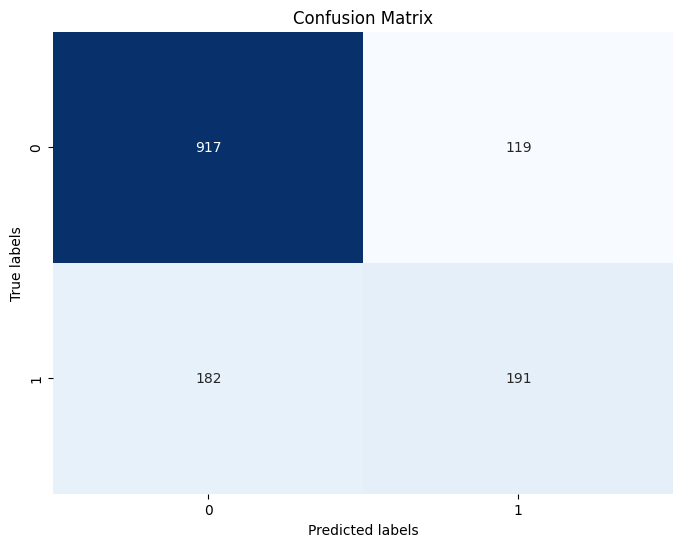

In [15]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

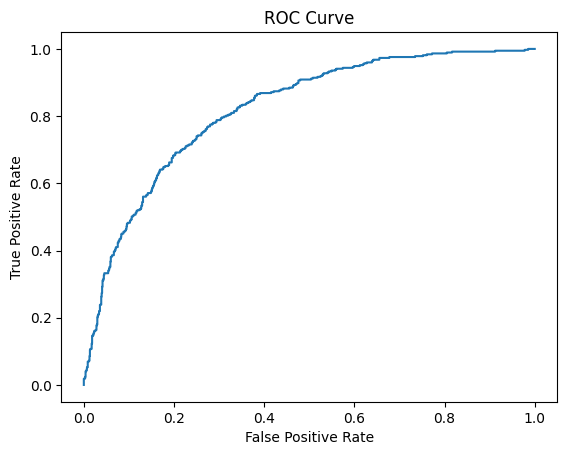

In [16]:
# Plot ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [17]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.82
